SCIKIT-LEARN

Biblioteka scikit-learn pozwala na zastosowanie algorytmów uczenia maszynowego. W podanym kodzie została przykładowo wykorzystana regresja liniowa. 

Przedmiotem testu jest porównanie wyników, jakie moze przedstawić badanie rynku mieszkaniowego oparte na uczeniu maszynowym, przeciwko wykorzystaniu asymetrycznych przedziałów liczbowych, gdzie do uczenia modelu zostały wykorzystane wartości expected wygenerowane przez AIN.

AIN wygrane: [ 6 55 39]
ML wygrane: [ 7  9 84]


/Users/filip/Desktop/4semestr/Programowanie /python.intro/.venv/lib/python3.13/site-packages/pymcdm/validators.py:525: UserWarning: Alternatives with indices [1] are dominated. Consider removing them, as such alternatives can cause numerical errors in some methods.
  warn(f'Alternatives with indices {dominated_alts} are dominated. Consider removing them, '
/Users/filip/Desktop/4semestr/Programowanie /python.intro/.venv/lib/python3.13/site-packages/pymcdm/validators.py:525: UserWarning: Alternatives with indices [1] are dominated. Consider removing them, as such alternatives can cause numerical errors in some methods.
  warn(f'Alternatives with indices {dominated_alts} are dominated. Consider removing them, '
/Users/filip/Desktop/4semestr/Programowanie /python.intro/.venv/lib/python3.13/site-packages/pymcdm/validators.py:525: UserWarning: Alternatives with indices [1] are dominated. Consider removing them, as such alternatives can cause numerical errors in some methods.
  warn(f'Alterna

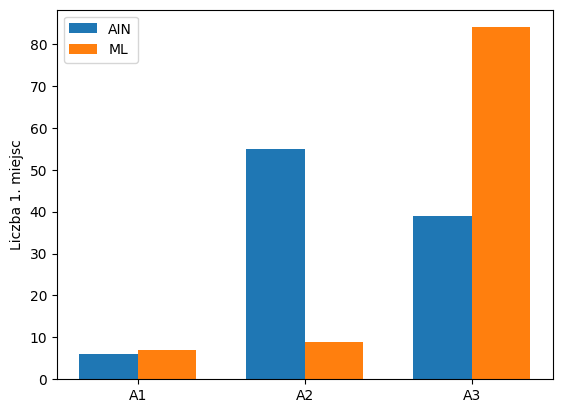

In [3]:
from asymintervals import AIN 
import numpy as np
from pymcdm.methods import SPOTIS
from pymcdm.helpers import rankdata
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ceny w postaci asymetrycznych liczb przedziałowych
price_ain = [
    AIN(600_000, 680_000, 650_000),
    AIN(500_000, 570_000, 520_000),
    AIN(500_000, 680_000, 600_000)
]

# wartości drugiego kryterium
rents = np.array([300,700,500])
weights = np.array([0.6, 0.4])      # wagi kryteriów
types = np.array([-1,-1])           # typy kryteriów (kosztowe)

rnd_ain = np.random.default_rng(0)  # generator losowy (AIN)
rankings_ain = []

for _ in range(100):                # symulacja Monte Carlo (AIN)
    prices = np.array([rnd_ain.uniform(x.lower, x.upper) for x in price_ain])
                                    # losowanie cen z przedziałów
    matrix = np.array([             # macierz decyzyjna
        [prices[0], rents[0]],
        [prices[1], rents[1]],
        [prices[2], rents[2]]
    ])
    bounds = np.array([             # granice kryteriów
        [np.min(prices), np.max(prices)],
        [np.min(rents), np.max(rents)]
    ])
    body_spotis = SPOTIS(bounds)    # inicjacja metody SPOTIS
    pref_spotis = body_spotis(matrix,weights, types)  # obliczenie preferencji
    ranking = rankdata(pref_spotis) # wyznaczenie rankingu
    rankings_ain.append(ranking)    # zapis rankingu


expected_prices = np.array([ain.expected for ain in price_ain])  # wartości oczekiwane AIN
X = np.arange(3).reshape(-1,1)       # zmienna objaśniająca
model = LinearRegression().fit(X, expected_prices)  # dopasowanie regresji liniowej

rnd_ml = np.random.default_rng(0)    # generator losowy (ML)
rankings_ml = []

for _ in range(100):                 # symulacja Monte Carlo (ML)
    prices_ml = model.predict(X) + rnd_ml.normal(0, 20000, 3)
                                    # predykcja ceny z szumem
    matrix = np.array([             # macierz decyzyjna
        [prices_ml[0], rents[0]],
        [prices_ml[1], rents[1]],
        [prices_ml[2], rents[2]]
    ])
    bounds = np.array([             # granice kryteriów
        [np.min(prices_ml), np.max(prices_ml)],
        [np.min(rents), np.max(rents)]
    ])
    body_spotis = SPOTIS(bounds)    # inicjacja metody SPOTIS
    pref_spotis = body_spotis(matrix,weights, types)  # obliczenie preferencji
    ranking = rankdata(pref_spotis) # wyznaczenie rankingu
    rankings_ml.append(ranking)     # zapis rankingu


rankings_ain = np.array(rankings_ain)
rankings_ml = np.array(rankings_ml)
ain_sum = np.sum(rankings_ain == 1, axis = 0)  # liczba zwycięstw (AIN)
ml_sum = np.sum(rankings_ml == 1, axis = 0)    # liczba zwycięstw (ML)

print("AIN wygrane:", ain_sum)
print("ML wygrane:", ml_sum)

width = 0.35
x = np.arange(3)

plt.bar(x - width/2, ain_sum, width, label='AIN')  # wykres wyników AIN
plt.bar(x + width/2, ml_sum, width, label='ML')   # wykres wyników ML
plt.xticks(x, ['A1', 'A2', 'A3'])
plt.ylabel('Liczba 1. miejsc')
plt.legend()
plt.show()
